In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from poly_reg import *

In [10]:
plt.rcParams['figure.figsize'] = (10, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
sns.set()
np.set_printoptions(precision=3, suppress=True)
# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
x = np.linspace(-5, 5, 1000)
y = x**2 +  np.random.normal(loc=0, scale=3, size=len(x))

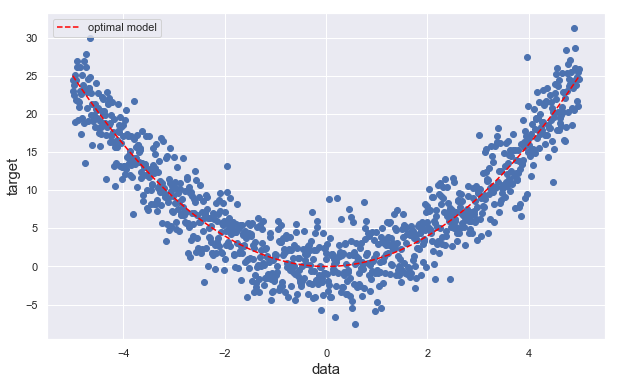

In [14]:
plt.scatter(x, y)
plt.plot(x, x**2, linestyle='--', color='red', label='optimal model')
plt.xlabel('data', fontsize=15)
plt.ylabel('target', fontsize=15)
plt.legend();

In [15]:
data = np.column_stack((np.ones_like(x), x ,x**2))
data

array([[ 1.  , -5.  , 25.  ],
       [ 1.  , -4.99, 24.9 ],
       [ 1.  , -4.98, 24.8 ],
       ...,
       [ 1.  ,  4.98, 24.8 ],
       [ 1.  ,  4.99, 24.9 ],
       [ 1.  ,  5.  , 25.  ]])

# Univariate Polynomial Regression
Simple polynomial regression is a regression model with a single explanatory variable and a single target value.

$$
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

## Gradient Descent 

Our task is to find the best possible polynomial that explains all the points in our dataset. We start by guessing initial values for the regression parameters $\theta$ and update the values using gradient descent. 

The objective of polynomial regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
$$

where the subscript $i$ is the i'th datapoint in the dataset.


$\theta_j$ are parameters of your model and by changing those values accordingly (using **gradient descent**) you will be able to lower the cost function $J(\theta)$:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i^j
$$

In polynomial regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [55]:
iterations = 150
theta = np.random.random(data.shape[1])

print('θ before training:', theta)
theta, loss = gradient_descent(data, y, theta, 0.005, iterations)
print('θ after training:', theta)

θ before training: [0.221 0.381 0.808]
θ after training: [0.21 0.02 0.98]


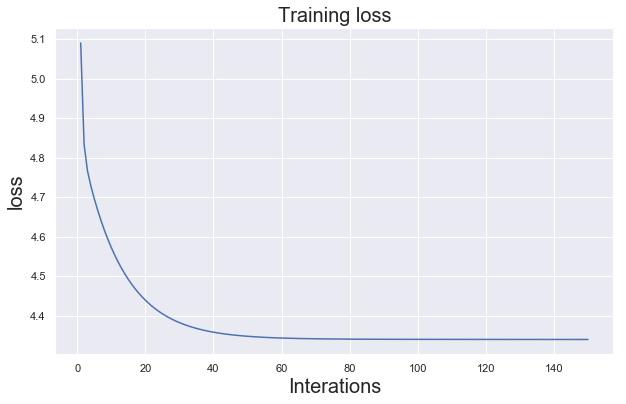

In [56]:
plt.plot(range(1, iterations+1), loss)
plt.title('Training loss', fontsize=20)
plt.xlabel('Interations', fontsize=20)
plt.ylabel('loss', fontsize=20);

In [59]:
predictions = data @ theta

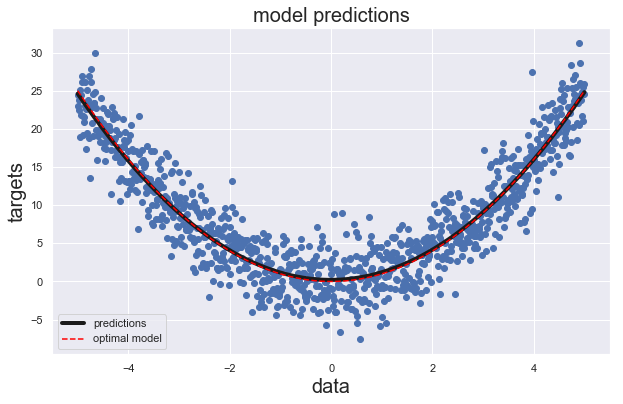

In [62]:
plt.scatter(x, y)
plt.plot(x, predictions, 'k', lw=4, label='predictions')
plt.plot(x, x**2, linestyle='--', color='red', label='optimal model')
plt.legend()
plt.xlabel('data', fontsize=20)
plt.ylabel('targets', fontsize=20)
plt.title('model predictions', fontsize=20);